### STOCK SENTIMENT ANALYSIS USING NEWS HEADLINES
IN THIS NOTEBOOK WE WILL CLASSIFY WHETHER THE STOCKS OF THE COMPANY WILL GO UP OR GO DOWN

ON THE BASIS OF THE TOP 25 HEADLINES ABOUT THE COMPANY.

WE WILL BE DOING TEXT PREPROCESSING AND THEN WE WILL USE RANDOM-FOREST CLASSIFIER AND NAIVE BAYES CLASSIFIER FOR THE PURPOSE OF CLASSIFICATION.

WE WILL USE BOTH 'BAG OF WORDS MODEL' AND 'TF-IDF VECTORIZER' TO CONVERT TEXT INTO VECTORS.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Stock_Headlines.csv", encoding='ISO-8859-1')

## Dataset Exploration

In [3]:
df.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links


#### Note: Here 'Label' is a binary attribute which consists 0 - Stock price goes down or stays the same, 1 - Stock price goes up.

In [4]:
df.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25'],
      dtype='object')

In [5]:
df.shape

(4101, 27)

In [6]:
df.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

In [7]:
df['Label'].value_counts()

Label
1    2166
0    1935
Name: count, dtype: int64

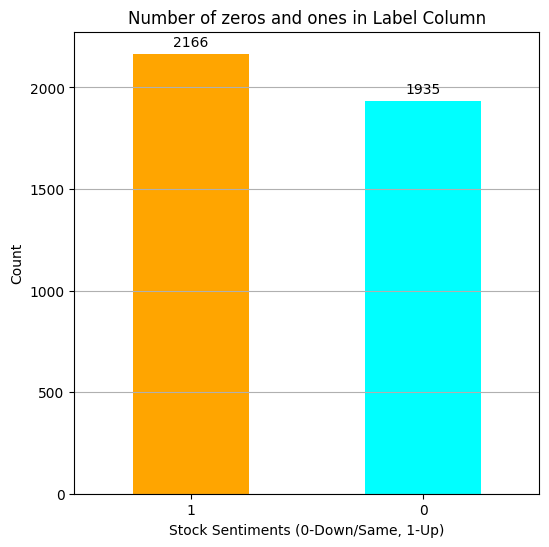

In [8]:
label_counts = df['Label'].value_counts()

# Define a color palette
colors = colors = ['orange', 'cyan']

# Plot the results
plt.figure(figsize=(6, 6))
bars = label_counts.plot(kind='bar', color=colors[:len(label_counts)])
plt.title('Number of zeros and ones in Label Column')
plt.xlabel('Stock Sentiments (0-Down/Same, 1-Up)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Annotate each bar with the count value
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 8), 
                 textcoords='offset points')

# Show the plot
plt.show()

In [9]:
# Splitting the dataset into train an test set
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']
print('Train size: {}, Test size: {}'.format(train.shape, test.shape))

Train size: (3975, 27), Test size: (378, 27)


In [10]:
# Splitting the dataset
y_train = train['Label']
X_train = train.drop(columns=['Label','Date'])
y_test = test['Label']
X_test = test.drop(columns=['Label','Date'])

In [11]:
y_train

0       0
1       0
2       0
3       1
4       1
       ..
3970    0
3971    0
3972    1
3973    0
3974    0
Name: Label, Length: 3975, dtype: int64

In [12]:
X_train

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar's debut double,"Southgate strikes, Leeds pay the penalty",...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,Hopkins 'furious' at Foster's lack of Hannibal...,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,England's decade of disasters,Revenge is sweet for jubilant Cronje,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,Alan Parker - part two,"Thuggery, Toxins and Ties",...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970,"Brazil declares emergency after 2,400 babies a...",Scientists find big 1500-yr-old Viking settlem...,Paris attacks: Belgian police arrest ninth sus...,Wiretapping reveals communication between Turk...,Russia airstrikes: Hundreds of Syrian civilans...,Pakistan changes neutral position on Syrian Ci...,North Korean diplomat arrested in South Africa...,German teachers want 'Mein Kampf' on syllabus,North Korea slave force earns Kim Jong Un regi...,"50,000 Yemeni Forces Preparing to Attack Saudi...",...,Report on sexual exploitation and abuse by pea...,Baby gir

In [13]:
print('X_train shape = {}'.format(X_train.shape))
print('X_test shape = {}'.format(X_test.shape))
print('y_train shape = {}'.format(y_train.shape))
print('y_test shape = {}'.format(y_test.shape))

X_train shape = (3975, 25)
X_test shape = (378, 25)
y_train shape = (3975,)
y_test shape = (378,)


In [14]:
# Importing essential libraries for performing Natural Language Processing on given dataset
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [15]:
# Removing punctuation and special character from the text
X_train.replace(to_replace='[^a-zA-Z]', value=' ', regex=True, inplace=True)
X_test.replace(to_replace='[^a-zA-Z]', value=' ', regex=True, inplace=True)

In [16]:
# Renaming columns
new_columns = [str(i) for i in range(0,25)]
X_train.columns = new_columns
X_test.columns = new_columns

In [17]:
# Converting the entire text to lower case
for i in new_columns:
  X_train[i] = X_train[i].str.lower()
  X_test[i] = X_test[i].str.lower()

In [18]:
# Joining all the columns
X_train_headlines = []
X_test_headlines = []

for row in range(0, X_train.shape[0]):
  X_train_headlines.append(' '.join(str(x) for x in X_train.iloc[row, 0:25]))

for row in range(0, X_test.shape[0]):
  X_test_headlines.append(' '.join(str(x) for x in X_test.iloc[row, 0:25]))

In [19]:
X_train_headlines[0]

'a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

In [20]:
X_test_headlines[0]

'most cases of cancer are the result of sheer bad luck rather than unhealthy lifestyles  diet or even inherited genes  new research suggests  random mutations that occur in dna when cells divide are responsible for two thirds of adult cancers across a wide range of tissues  iran dismissed united states efforts to fight islamic state as a ploy to advance u s  policies in the region   the reality is that the united states is not acting to eliminate daesh  they are not even interested in weakening daesh  they are only interested in managing it  poll  one in   germans would join anti muslim marches uk royal family s prince andrew named in us lawsuit over underage sex allegations some    asylum seekers refused to leave the bus when they arrived at their destination in rural northern sweden  demanding that they be taken back to malm or  some big city   pakistani boat blows self up after india navy chase  all four people on board the vessel from near the pakistani port city of karachi are bel

In [21]:
# Creating corpus of train dataset
ps = PorterStemmer()
X_train_corpus = []

for i in range(0, len(X_train_headlines)):
  
  # Tokenizing the news-title by words
  words = X_train_headlines[i].split()

  # Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  headline = ' '.join(words)

  # Building a corpus of news-title
  X_train_corpus.append(headline)

In [22]:
# Creating corpus of test dataset
X_test_corpus = []

for i in range(0, len(X_test_headlines)):
  
  # Tokenizing the news-title by words
  words = X_test_headlines[i].split()

  # Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  headline = ' '.join(words)

  # Building a corpus of news-title
  X_test_corpus.append(headline)

In [23]:
X_train_corpus[0:10]

['hindranc oper extract leak report scorecard hugh instant hit buoy blue jack get skate ice cold alex chao maracana build unit deplet leicest prevail elliott spoil everton parti hungri spur sens rich pick gunner wide easi target derbi rais glass strupar debut doubl southgat strike leed pay penalti hammer hand robson youth lesson saint parti like wear wolv turn lamb stump mike catch testi gough taunt langer escap hit flintoff injuri pile woe england hunter threaten jospin new battl somm kohl successor drawn scandal differ men women sara denver nurs turn solicitor diana landmin crusad put tori panic yeltsin resign caught opposit flat foot russian roulett sold recov titl',
 'scorecard best lake scene leader german sleaz inquiri cheerio boyo main recommend cubi kill fee cubi kill fee cubi kill fee hopkin furiou foster lack hannib appetit cubi kill fee tale two tail say like like say elbow eye nippl task forc assess risk asteroid collis found last critic list time live dear doctor irish cou

In [24]:
X_test_corpus[0:10]

['case cancer result sheer bad luck rather unhealthi lifestyl diet even inherit gene new research suggest random mutat occur dna cell divid respons two third adult cancer across wide rang tissu iran dismiss unit state effort fight islam state ploy advanc u polici region realiti unit state act elimin daesh even interest weaken daesh interest manag poll one german would join anti muslim march uk royal famili princ andrew name us lawsuit underag sex alleg asylum seeker refus leav bu arriv destin rural northern sweden demand taken back malm big citi pakistani boat blow self india navi chase four peopl board vessel near pakistani port citi karachi believ kill dramat episod arabian sea new year eve accord india defenc ministri sweden hit third mosqu arson attack week car set alight french new year salari top ceo rose twice fast averag canadian sinc recess studi norway violat equal pay law judg say judg find consul employe unjustli paid less male counterpart imam want radic recruit muslim you

In [25]:
down_words = []
for i in list(y_train[y_train==0].index):
  down_words.append(X_train_corpus[i])

up_words = []
for i in list(y_train[y_train==1].index):
  up_words.append(X_train_corpus[i])

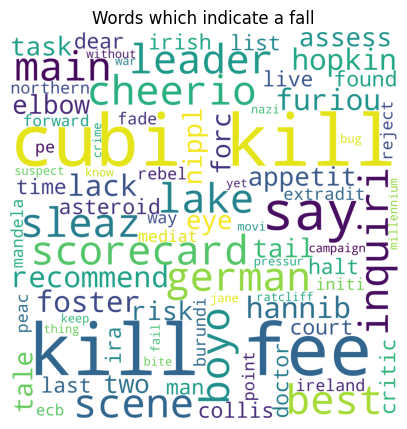

In [26]:
# Creating wordcloud for down_words
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=2500, height=2500).generate(down_words[1])
plt.figure(figsize=(5,6))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate a fall")
plt.show()

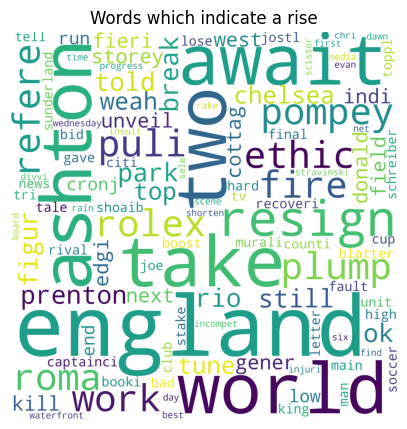

In [27]:
# Creating wordcloud for up_words
wordcloud2 = WordCloud(background_color='white', width=2500, height=2500).generate(up_words[5])
plt.figure(figsize=(5,6))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate a rise")
plt.show()

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(ngram_range=(2,2))
train = tfidf.fit_transform(X_train_corpus)
test = tfidf.transform(X_test_corpus)

In [29]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(train, y_train)

LogisticRegression()

In [30]:
lr_y_pred = lr_classifier.predict(test)

In [31]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, lr_y_pred)
score2 = precision_score(y_test, lr_y_pred)
score3 = recall_score(y_test, lr_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 84.92%
Precision score is: 0.78
Recall score is: 0.99


In [32]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, lr_y_pred)

In [33]:
lr_cm

array([[131,  55],
       [  2, 190]], dtype=int64)

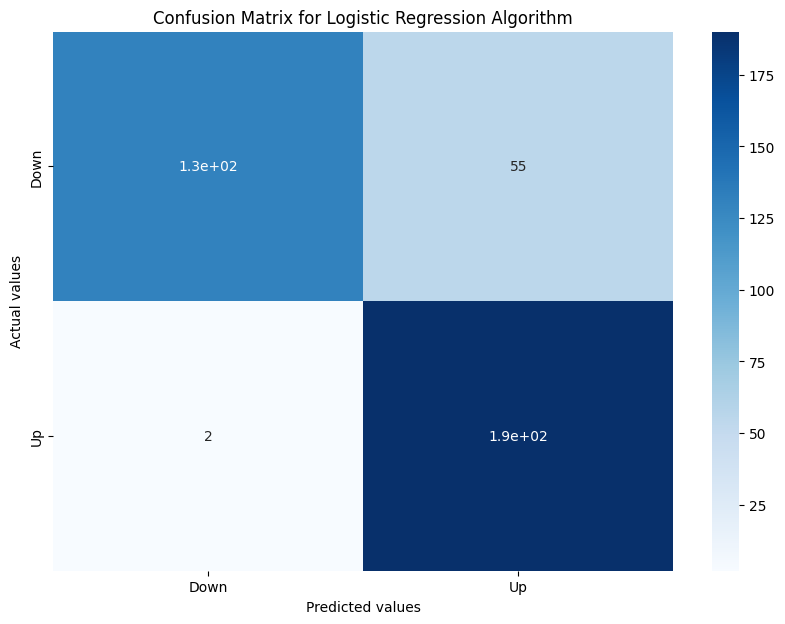

In [34]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=lr_cm, annot=True, cmap="Blues", xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression Algorithm')
plt.show()

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf_classifier.fit(train, y_train)

RandomForestClassifier(criterion='entropy')

In [36]:
rf_y_pred = rf_classifier.predict(test)

In [37]:
# Accuracy, Precision and Recall
score1 = accuracy_score(y_test, rf_y_pred)
score2 = precision_score(y_test, rf_y_pred)
score3 = recall_score(y_test, rf_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 84.13%
Precision score is: 0.79
Recall score is: 0.93


In [38]:
# Making the Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)
rf_cm

array([[139,  47],
       [ 13, 179]], dtype=int64)

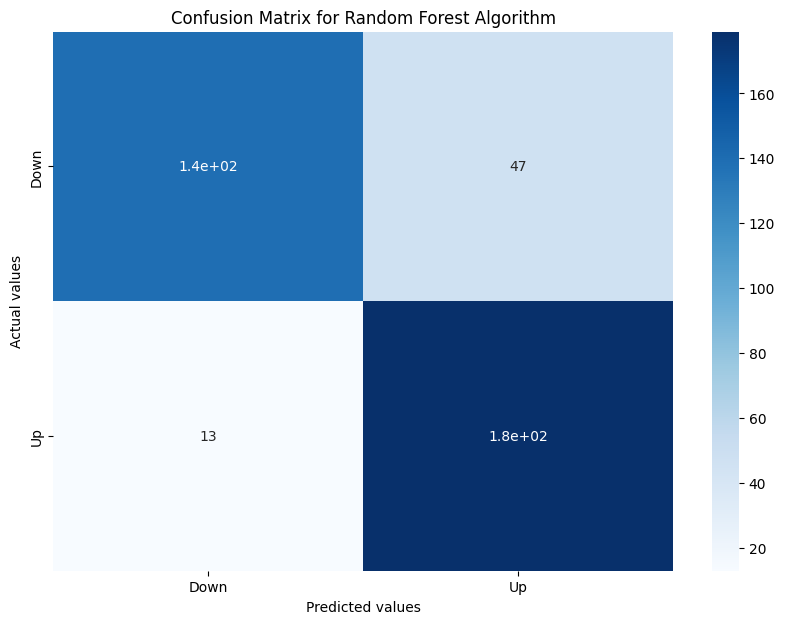

In [39]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=rf_cm, annot=True, cmap="Blues", xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Random Forest Algorithm')
plt.show()

In [40]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(train, y_train)

MultinomialNB()

In [41]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(test)

In [42]:
# Accuracy, Precision and Recall
score1 = accuracy_score(y_test, nb_y_pred)
score2 = precision_score(y_test, nb_y_pred)
score3 = recall_score(y_test, nb_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 84.92%
Precision score is: 0.78
Recall score is: 0.99


In [43]:
# Making the Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)
nb_cm

array([[131,  55],
       [  2, 190]], dtype=int64)

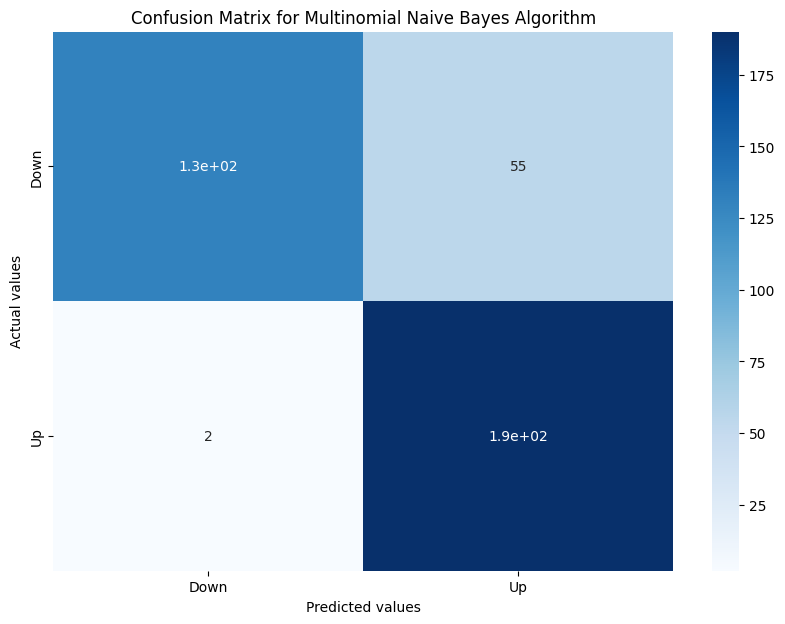

In [44]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [75]:
import re

def stock_prediction(sample_news):
  sample_news = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_news)
  sample_news = sample_news.lower()
  sample_news_words = sample_news.split()
  sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_news = [ps.stem(word) for word in sample_news_words]
  final_news = ' '.join(final_news)

  temp = tfidf.transform([final_news]).toarray()
  return lr_classifier.predict(temp)

In [76]:
# For generating random integer
from random import randint

In [77]:
sample_test = df[df['Date'] > '20141231']

In [78]:
sample_test.reset_index(inplace=True)
sample_test = sample_test['Top1']

In [94]:
# Predicting values
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]

print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: Amnesty Int. has accused Qatar of using forced labor at World Cup stadium. Amnesty says workers are forced to live in squalid conditions, pay huge recruitment fees, have wages and passports withheld. It accuses Fifa of "failing almost completely" to stop the tournament "built on human rights abuses"
Prediction: The stock price will remain the same or will go down.


In [95]:
# Predicting values
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]

print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: Another drug Cycloserine sees a 2000% price jump overnight as patent sold to pharmaceutical company. The ensuing backlash caused the companies to reverse their deal. Expert says If it weren't for all of the negative publicity the original 2,000 per cent price hike would still stand.
Prediction: The stock price will go up!
